# Parte 1
**Evaluación Análisis Avanzado de Datos**

----

**Alejandra Contreras C.**

**Germán David Plazas C.**

**David Alfonso Oviedo S.**

**Santiago Rodríguez M.**

----

# **Comentarios**

## Análisis Exploratorio de Datos
Deben visualizar la relación entre las diferentes características y la variable objetivo ("Age"). Además, deben verificar la correlación entre las características y la variable objetivo.

**Comentarios**

Análisis exploratorio de datos riguroso, abarcando varios elementos cruciales para entender las características del conjunto de datos.
No obstante, toman la decisión apresurada de segmentar los datos en función de la variable 'Sex', optando por excluir la categoría 'I' sin proporcionar una justificación sólida para esta elección. A pesar de que el uso de PCA no era un requisito, hacen un buen trabajo al implementarlo para la selección de características.


**Puntos o totales: 10/10**

## Construcción del Modelo:
Deben construir un modelo de regresión, que puede ser lineal múltiple o polinomial, para predecir la edad del cangrejo. Deben evaluar el modelo utilizando métricas como RMSE y MAE.

**Comentarios**

#### **Selección de Características**

hacen una selección de caracterisca acorde a lo analizado en el anterior punto y es muy positivo

#### **Validación**

En relación al uso de la validación cruzada, no se considera la varianza como un factor para determinar qué modelos son los más adecuados. Aunque esta métrica podría inferirse visualmente a partir de los histogramas presentados, no se proporciona una cifra específica para la varianza. Sin embargo, la elección del modelo de segundo grado se explica de manera bastante clara y convincente.

**Puntos o totales: 24/25**


##Entrenamiento Final y Evaluación:


**Puntos o totales: 14/15**



## Objetivo

Desarrollar un modelo que pueda **predecir con precisión la edad** de los cangrejos, machos y hembras en función de sus características.

----

Antes de comenzar importemos las librerias y paquetes que se requeridos.

In [ ]:
# Importar paquetes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from google.colab import widgets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA

----

## 1.a. Análisis exporatorio de los datos

----

### Estádisticas descriptivas

Para iniciar con el ejercicio, debemos cargar nuestros datos que están consignados en el archivo 'CrabAgePrediction_Subset1.csv'.

In [ ]:
#Importar los datos de CrabAgePrediction.
crabdf = pd.read_csv('CrabAgePrediction_Subset1.csv')

In [ ]:
crabdf

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8
...,...,...,...,...,...,...,...,...,...
1941,M,1.6500,1.3250,0.4250,39.419980,16.740380,6.010094,12.842323,15
1942,F,1.2875,1.0375,0.3500,19.660378,8.830869,4.309124,5.669900,10
1943,M,1.2375,0.9875,0.3000,15.677274,6.350288,3.898056,4.734367,8
1944,I,0.9250,0.7250,0.2000,7.214948,3.061746,1.601747,1.984465,6


Así mismo, veamos cuales características de los cangrejos están almacenadas en el dataset.

In [ ]:
crabdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1946 non-null   object 
 1   Length          1946 non-null   float64
 2   Diameter        1946 non-null   float64
 3   Height          1946 non-null   float64
 4   Weight          1946 non-null   float64
 5   Shucked Weight  1946 non-null   float64
 6   Viscera Weight  1946 non-null   float64
 7   Shell Weight    1946 non-null   float64
 8   Age             1946 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 137.0+ KB


Los datos contienen la siguiente información:

1. Sex - Genero del cangrejo (categorica - M=macho, H=hembra, I=indefinido)
2. Length - Longitud del cangrejo en pies [ft] (númerico - float)
3. Diameter - Diametro del cangrejo en pies [ft] (númerico - float)
4. Height - Altura del cangrejo en pies [ft] (númerico - float)
5. Weight - Peso del cangrejo en onzas [oz] (númerico - float)
6. Shucked Weight - Peso de cangrejo sin caparazón en onzas [oz] (númerico - float)
7. Viscera Weight - Peso de los organos abdominales dentro del cuerpo del cangrejo en onzas [oz] (númerico - float)
8. Shell Weight - Peso del caparazón en onzas [oz] (númerico - float)
9. Age - Edad del cangrejo en meses (númerico - int)


Además, corrobramos que no se tienen datos nulos en los registros del dataframe.

Como queremos desarrollar un modelo contemplando únicamente a los cangrejos machos y hembras, vamos a eliminar los registros con el sexo I (indefinido) del dataset.

In [ ]:
df = crabdf.loc[crabdf['Sex'] != 'I']

In [ ]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
5,M,1.2875,1.0125,0.3625,19.702903,6.095142,4.635143,6.633783,15
6,M,0.7750,0.5875,0.1500,3.401940,1.176504,0.935534,1.133980,11
...,...,...,...,...,...,...,...,...,...
1940,M,1.7625,1.3750,0.5250,40.780756,18.568922,9.227762,13.097469,11
1941,M,1.6500,1.3250,0.4250,39.419980,16.740380,6.010094,12.842323,15
1942,F,1.2875,1.0375,0.3500,19.660378,8.830869,4.309124,5.669900,10
1943,M,1.2375,0.9875,0.3000,15.677274,6.350288,3.898056,4.734367,8


In [ ]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

Encontremos el tamaño del dataset.

In [ ]:
df.shape

(1327, 9)

Entonces, tenemos 1327 registros de cangrejos y tenemos 9 características a consignadas.

De igual forma, veamos un resumen estadístico básico de los datos

In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,1.427845,1.120158,0.388216,29.061560,12.498551,6.357220,8.347635,10.901281
std,0.239555,0.197911,0.103930,12.819694,5.922685,2.854998,3.687069,3.107922
min,0.412500,0.312500,0.100000,0.694563,0.269320,0.127573,0.226796,4.000000
25%,1.287500,1.000000,0.337500,20.177757,8.242617,4.379998,5.903783,9.000000
50%,1.462500,1.150000,0.387500,28.647170,12.303683,6.180191,8.136306,10.000000
75%,1.600000,1.250000,0.437500,37.059884,16.237176,8.270967,10.489315,12.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,18.186204,25.429502,27.000000


Así visualizamos que:
* La edad de los cangrejos está entre los 4 a los 27 meses, con una media de 10.9 meses. La dispersión de los datos es de 3.10. Considerando que la mediana y la media de los datos están cerca al valor de 10 meses de edad, podemos considerar que los datos están distribuidos de una manera aproximadamente simétrica. Vemos que los percentiles son de 9, 10 y 12 meses respectivamente, por lo cual, podemos considerar que los valores de edad mínima y máxima de los cangrejos son atípicos.

* Respecto a la longitud y diametro de los cangrejos, vemos que la media se ubica en los 1.42 y 1.12 pies respectivamente.

* Por su parte, para el peso del cangrejo, vemos que su media se encuentra en las 29.06 onzas.


Contemos cuales edades hay en el conjunto de datos y cuales son las edades atípicas.

In [ ]:
age_counts = df['Age'].value_counts()

# Convertir a dataframe
age_counts_df = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values})

# Using DataFrame.to_string() to print without index
age_counts_df = age_counts_df.to_string(index=False)
print(age_counts_df)

 Age  Count
  10    250
   9    245
  11    207
   8    142
  12    107
  13     74
   7     56
  14     54
  15     45
  17     27
  16     26
   6     22
  18     21
  19     13
   5     10
  20      9
  21      6
  23      5
  22      2
  27      2
  24      2
   4      1
  26      1


Con esto vemos que efectivamente, las edades de más de 20 meses tienen bajos registros. En partícular, tenemos un único registro de 4 meses de edad y uno de 26 meses de edad.

Adicionalmente, se puede observar que la mayoría de los registros son de cangrejos con 10 meses de edad.

In [ ]:
df['Sex'].value_counts()

M    727
F    600
Name: Sex, dtype: int64

Igualmente, vemos que hay más registros de machos que de hembras en el dataset.

Ahora bien, con el mapa de correlación podemos encontrar más información soble las relaciones lineales entre las variables númericas de nuestro conjunto de datos.

<Axes: >

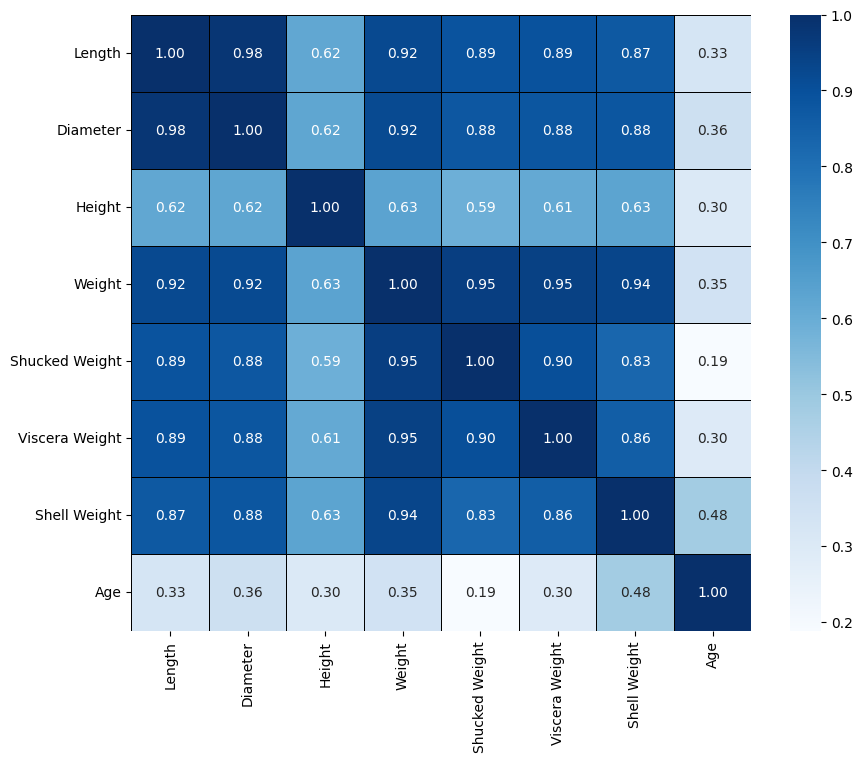

In [ ]:
# Matriz de correlación

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", linewidths=0.5, linecolor="black", fmt=".2f")

Con esto podemos concluir que:

* Todas las correlaciones ente las variables son positivas.
* Observamos que la característica de length y diameter están altamente correlacionadas entre sí, **por lo que se podría eliminar una de ellas para evitar la multicolinealidad en la regresión lineal**.
* Adicionalmente, como nos indica la lógica por cómo se obtienen las medidas del peso, vemos que las variables de peso, peso del caparazón, peso de las viseras abdominales del cangrejo y el peso del cangrejo sin el caparazón están altamente correlacionadas.
* Entre las variables predictoras y la edad de los cangrejos, el atributo del peso del caparazón es el que tiene una mayor correlación respecto a las demás características. Este es seguido por el diametro y peso del cangrejo. Lo cual nos indica que a mayor peso del caparazon, resultan en un cangrejo con más edad, a más diametro del cangrejo, mayor edad del cangrejo y a mayor peso, el cangrejo tiene más edad.
* Hay una correlación débil entre la edad de los cangrejos y el peso del cangrejo sin caparazón, por lo que podríamos decir que no hay una relación lineal clara entre estas dos variables.

-----

### Visualización de los datos

**Histogramas**

Veamos los histogramas de las variables predictoras numéricas para visualizar su distribución y verificar si hay alguna de las variables sesgada.

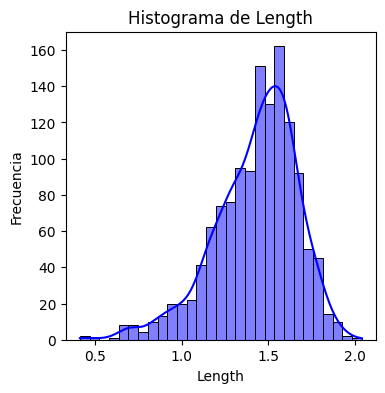

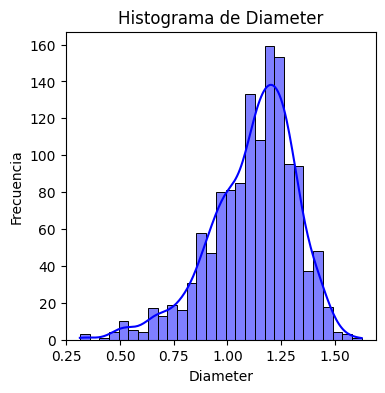

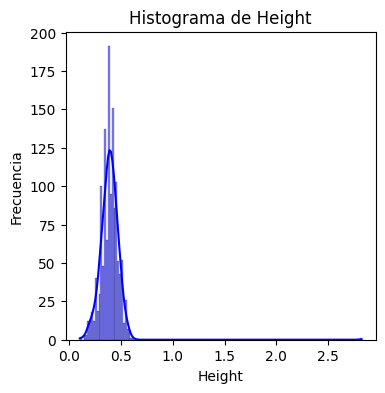

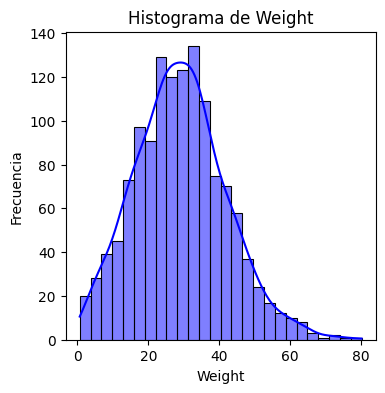

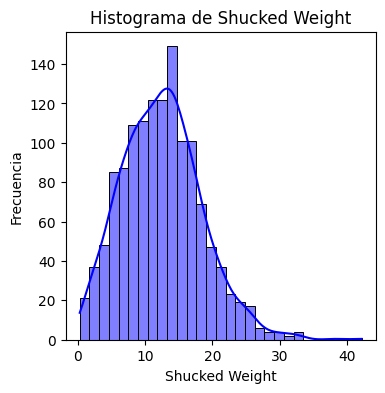

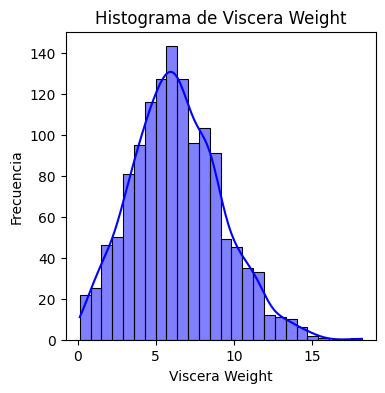

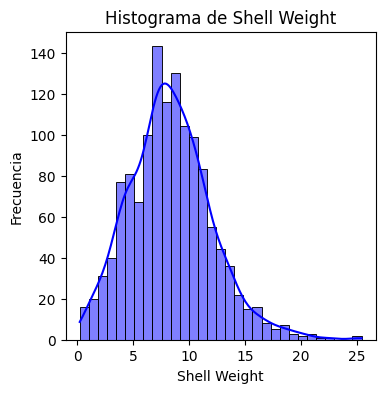

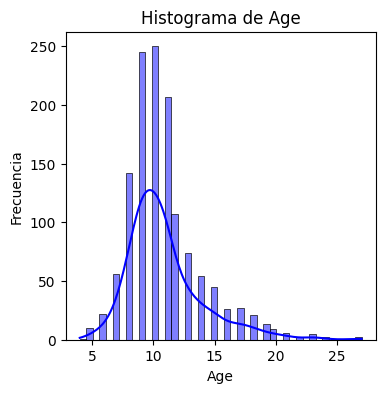

In [ ]:
# Lista de todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Crear histogramas para cada una de las variables
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Con esto es importante resaltar que:
* La variable Height tiene un sesgo a la derecha, generado en mayor medida por datos atípicos.
* Length y diameter tienen un leve sesgo a la izquierda. Mientras que weight, shucked weight, visera weight y shell weight tienen una distribución de los datos con un sesgo positivo.
* Para el caso de nuestra variable objetivo, vemos que efectivamente la mayoría de los cangrejos tienen una edad que oscila entre los 9 y 10 meses, y se tiene un sesgo a derecha a raíz de los datos atípicos mencionados anteriormente.

**Diagramas de dispersión**

Adicionalmente, es importante considerar la manera en la cual se distribuyen los datos en relación con la variable objetivo.

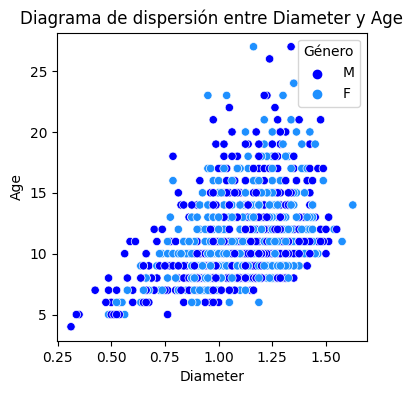

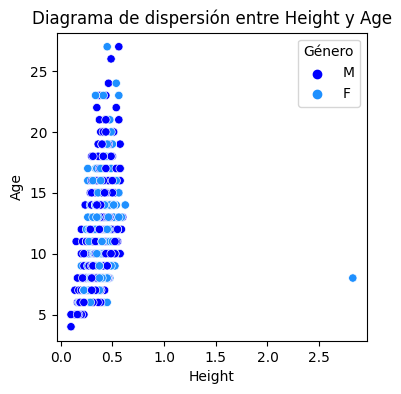

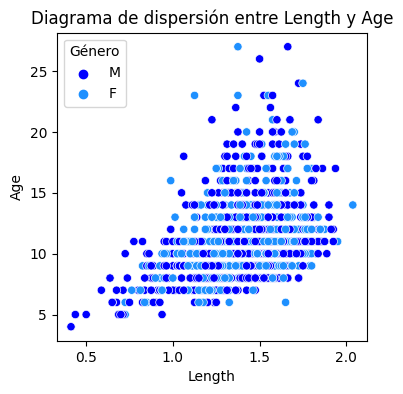

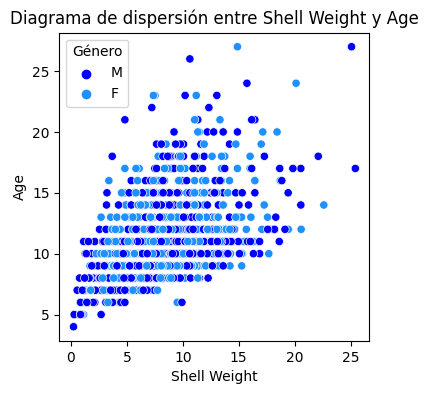

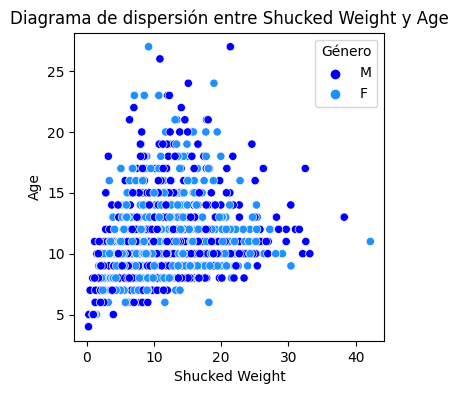

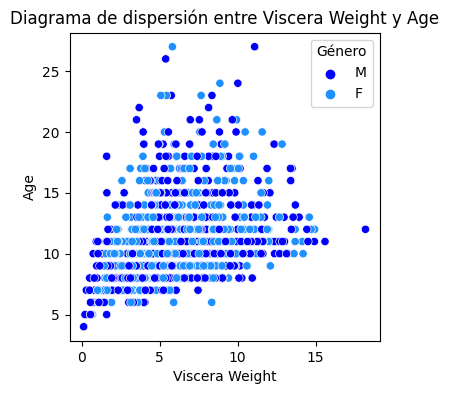

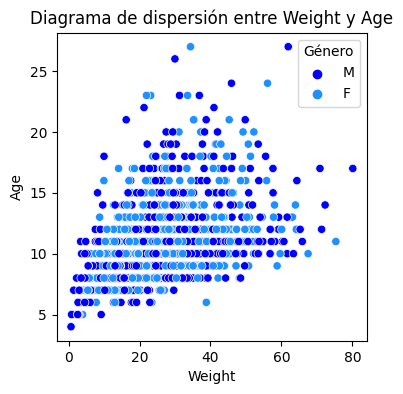

In [ ]:
# Lista de todas las columnas numéricas excepto 'age'
numeric_columns = df.select_dtypes(include=['number']).columns.difference(['Age'])

# Crear scatter plots para cada una de las variables númericas con la edad
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=df, x=column, y='Age', hue='Sex', palette={'M': 'blue', 'F': 'dodgerblue'})
    plt.title(f'Diagrama de dispersión entre {column} y Age')
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.legend(title='Género')
    plt.show()


De acuerdo a los gráficos realizados podemos realizar las siguientes observaciones:

* **Diameter y Age**: Entre las variables se tiene una baja correlación positiva. Por tanto, podríamos considerar que en la mayoría de los casos se sigue el comportamiento de que a mayor diametro del cangrejo, resulta en un cangrejo más viejo.
* **Height y Age**:  De acuerdo al gráfico de dispersión se obseva una alta correlación positiva entre las variables. En este sentido, podemos contemplar que entre más alto el cangrejo, este tiene más edad.
* **Length y Age**: Este diagrama nos permite mencionar que hay una baja correlación positiva entre las variables, lo que indica que a mayor longitud del cangrejo generalmente resultan en un cangrejo con más edad.
* **Shell Weight y Age**: Donde se tiene una correlación positiva pero baja entre estas variables. Por tanto, usualmente los cangrejos con un caparazón de bajo peso, son más jovenes.
* **Shucked Weight y Age**: En este caso, vemos que ambas variables tienen una baja correlación positiva. Resultando en que, en la mayoría de los casos se tiene que entre más bajo el peso únicamente del cangrejo, su edad va a ser más baja.
* **Viscera Weight y Age**: Nuevamente, contemplamos una correlación positiva pero baja, de tal forma que, a menor peso de las visceras abdominales de los cangrejos, menor es su edad.
* **Weigth y Age**: Con estas variables observamos una correlación baja y positiva. En este sentido, frecuentemente tenems que a mayor peso del cangrejo (junto con su caparazón), mayor su edad.

Igualmente, vemos que en el caso de la dispersión del peso de los cangrejo y las edades, se tiene con el aumento de la edad y de del peso varios datos atípicos que no siguen el comportamiento previo de los datos.

Así, corroboramos la información obtenida a partir de la matriz de correlación. Todas las correlaciones entre los atributos y la variable respuesta son positivas, y dentro de las correlaciones hay variaciones en la fuerza de relación entre ellas.

---

Después de estos análisis y observando la matriz de correlación concluimos que todas las variables predictoras tienen una alta correlación entre ellas a excpeción de la variable *Height*. Es por esto que pensamos en la posibilidad de hacer una reducción de dimensionalidad y así, encontrar un modelo de regresión más sencillo, con menos costo computacional y error pequeño.

En la celda a continuación, tomamos las variables predictorias: *Length, Diameter,	Height,	Weight,	Shucked Weight,	Viscera Weight,	Shell Weight* y aplicamos PCA (Principal Component Analysis) para ver que variables son las que tendran un peso mayor al momento de hacer regresión. Decidimos usar inicialmente 3 componentes principales y obsevar los resultados.

In [ ]:
X = df.drop(['Age', 'Sex'],axis=1)
pca = PCA(n_components=3)
Principal_components=pca.fit_transform(X)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3'])
componentes_principales = pca.components_
print(componentes_principales)

[[ 1.50770919e-02  1.23832216e-02  4.48013800e-03  8.71727661e-01
   3.88629799e-01  1.84335812e-01  2.33831859e-01]
 [-1.19313831e-03 -4.78115001e-03 -5.31898085e-03 -1.85196540e-01
   7.74595194e-01  1.02372818e-02 -6.04604955e-01]
 [-5.13586791e-03  2.41526878e-04 -3.94388354e-04 -1.27504368e-01
   3.62409896e-01 -7.82402094e-01  4.90124551e-01]]


Como se evidencia en la celda anterior, imprimimos los coeficientes de cada una de las 3 componentes principales y a partir de esto analizamos cuáles son las variables de mayor importancia. A partir de la primera componente principal observamos que los coeficientes correspondientes a las 3 primeras variables *(Length, Diameter, Height)* son los más pequeños presentando valores aproximados de 0.015, 0.012 y 0.0048 lo cual nos indica que posiblemente estas 3 variables no tienen un peso significativo a la hora de hacer un modelo de regresión. Sin embargo, si notamos los coeficientes de las ultimas 4 variables *(Weight, Shucked Weight, Viscera Weight, Shell Weight)* estos son los que tienen los valores más grandes, luego, concluimos que las variables que más peso tienen a la hora de hacer un modelo de regresión son: **(Weight, Shucked Weight, Viscera Weight, Shell Weight)**

El análisis anterior se puede repetir por cada una de las componentes principales y sus respectivos coeficientes arrojando el mismo resultado.

Finalmente, realizamos un diagrama de codo, para poder determinar el porcentaje total de la varianza que explica cada componente principal.

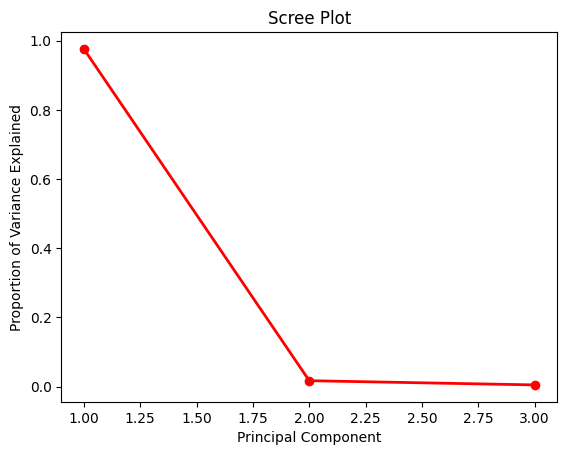

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

La anterior gráfica nos dice que la primera componente principal explica el total de la varianza, luego, el análisis hecho anteriormente respecto a las 4 variables con más peso resulta correcto.

Por esto, y para conlcuir la primera parte de este trabajo, decidimos tomar unicamente las variables **(Weight, Shucked Weight, Viscera Weight, Shell Weight)** como predictoras para construir nuestro modelo de regresión.

 ----

 ## 1.b. Modelos de Regresión
 ---

Con el objetivo de construir el mejor modelo para la predicción de la edad de los cangrejos, vamos a crear diferentes modelos lineales y polinomiales. Vamos a evaluar el desempeño de los modelos usando las métricas RMSE y MAE. Y tras la validación de los modelos, seleccionaremos el modelo con el mejor desempeño.

Iniciemos con la separación del conjunto en los atributos $X$ y variable objetivo $y$ (Age). De igual forma, removemos los predictores categoricos dadas las instrucciones del ejercicio

In [ ]:
X = df.drop(['Sex','Height','Length','Diameter','Age'],axis=1)
X

,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,35.876292,17.434942,7.866986,9.525432
1,43.218813,18.512224,11.226402,11.623295
2,32.502702,15.620575,6.917278,7.895336
5,19.702903,6.095142,4.635143,6.633783
6,3.401940,1.176504,0.935534,1.133980
...,...,...,...,...
1940,40.780756,18.568922,9.227762,13.097469
1941,39.419980,16.740380,6.010094,12.842323
1942,19.660378,8.830869,4.309124,5.669900
1943,15.677274,6.350288,3.898056,4.734367


In [ ]:
y = df["Age"]
y

0        9
1       11
2        8
5       15
6       11
        ..
1940    11
1941    15
1942    10
1943     8
1945    10
Name: Age, Length: 1327, dtype: int64

----
Ahora, separemos el conjunto de datos en los subconjuntos train y test. Lo haremos siguiendo una proporción de 80-20. Tendremos en cuenta realizar

In [ ]:
X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=42)

Definimos unas funciones que nos serán útiles para nuestro análisis.

La función *Model* recibe 3 parámetros *X_train, y_train, degree*. En esta creamos y ajustamos un modelo multilineal de grado *degree*, luego,  obtenemos el rmse y el mae de entrenamiento y retornamos **el modelo**, **la matriz de características** (consta de todas las combinaciones polinómicas de los predictores con un grado menor o igual al grado especificado), el rmse y el mae.

La función *graphMultiModel3D* nos ayuda a construir el histograma correspondiente a la cantidad de modelos por cada rmse-mae. Hacemmos uso de esta función principalmente por la aplicación de cross-validation.

La función *CrossVal* es la encargada de hacer validación cruzada. En esta usamos 5 particiones del conjunto X e y.



In [ ]:
def Model(X_train, y_train, degree):

  polynomial_features = PolynomialFeatures(degree=degree)
  X_poly = polynomial_features.fit_transform(X_train)


  model = LinearRegression()
  model.fit(X_poly, y_train) #Fitting the model

  X_test_poly = polynomial_features.transform(X_train)
  y_pred = model.predict(X_test_poly)

  rmse = np.sqrt(mean_squared_error(y_train, y_pred))
  mae = mean_absolute_error(y_train, y_pred)

  return model, polynomial_features, rmse,mae

def graphMultiModel3D(rmses, maes, degree):

    fig = plt.figure(figsize=(15, 5))
    gs = GridSpec(1, 2, width_ratios=[3, 2])

    # Subgráfica 3D a la izquierda
    ax1 = fig.add_subplot(gs[0])
    ax1.hist(rmses, bins=10, edgecolor='black')  # bins = número de divisiones en el histograma
    ax1.set_xlabel('RMSE')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Histograma de Frecuencias de Cross Validation de regresión de grado ' + str(degree) + " de RMSE")

    # Histograma a la derecha
    ax2 = fig.add_subplot(gs[1])
    ax2.hist(maes, bins=10, edgecolor='black')  # bins = número de divisiones en el histograma
    ax2.set_xlabel('MAE')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Histograma de Frecuencias de Cross Validation de regresión de grado ' + str(degree)+ " de MAE")

    # Ajustar el espaciado entre las subgráficas
    plt.tight_layout()

    # Mostrar la figura con la gráfica 3D y el histograma en la misma fila
    plt.show()

def CrossVal(n_folds,X,y,degree,model, polynomial_features):

    # Create a k-fold cross-validator
    kf = KFold(n_splits=n_folds)

    # Initialize a list to store performance scores
    maes = []
    rmses= []

    # Perform cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model, polynomial_features, rmseT, maeT = Model(X_train, y_train, degree)

        X_test_poly = polynomial_features.transform(X_val)
        y_pred = model.predict(X_test_poly)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)

        # Evaluate and store the score
        rmses.append(rmse)
        maes.append(mae)

    average_scoreRMSE = sum(rmses) / n_folds
    average_scoreMAE = sum(maes) / n_folds

    return average_scoreRMSE, average_scoreMAE, rmses, maes

Ahora, generamos 5 pestañas, en donde entrenamos modelos polinomiales multivariados de grado 1 hasta grado 5. Podemos ver el error de enttrenamiento y las gráficas generadas.

Para revisar nuestro modelo, realizamos validación cruzada partiendo el conjunto en 5 partes y hallamos una media del RMSE. Realizamos un histograma de frecuencias de las particiones del modelo, para ver donde se ubica la media.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

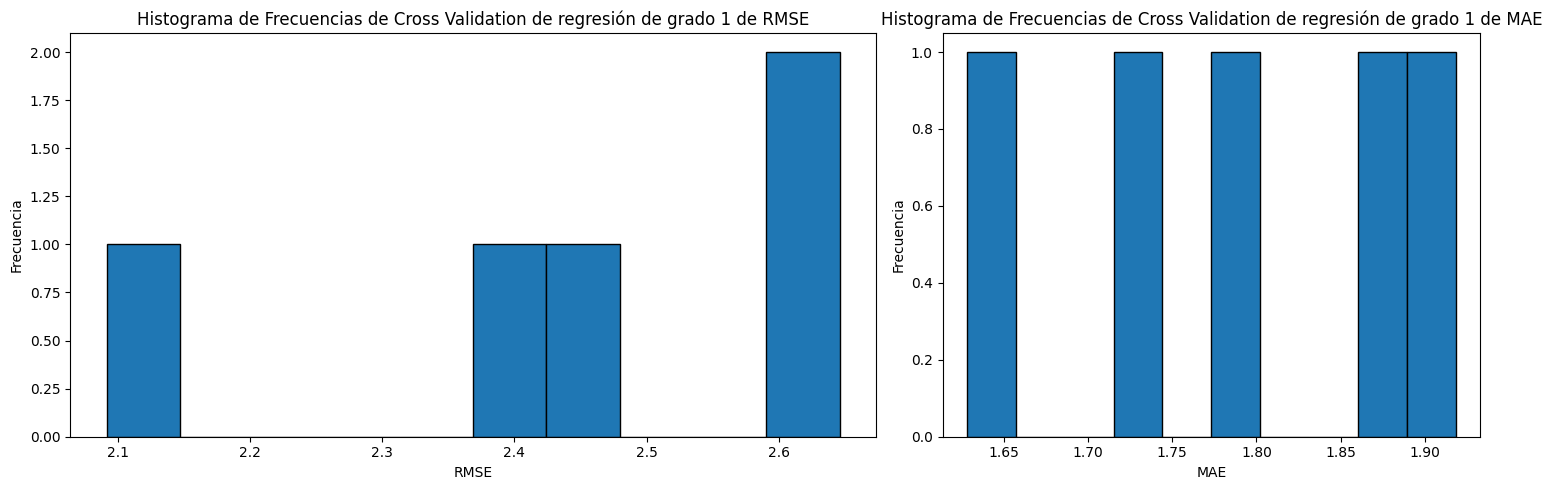

Rmse train: 2.4201764616148727
MAE train: 1.7403368219146054
Degree: 1
Cross Validations average RMSE: 2.438995530973448
Cross Validations average MAE: 1.7854145429322519


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

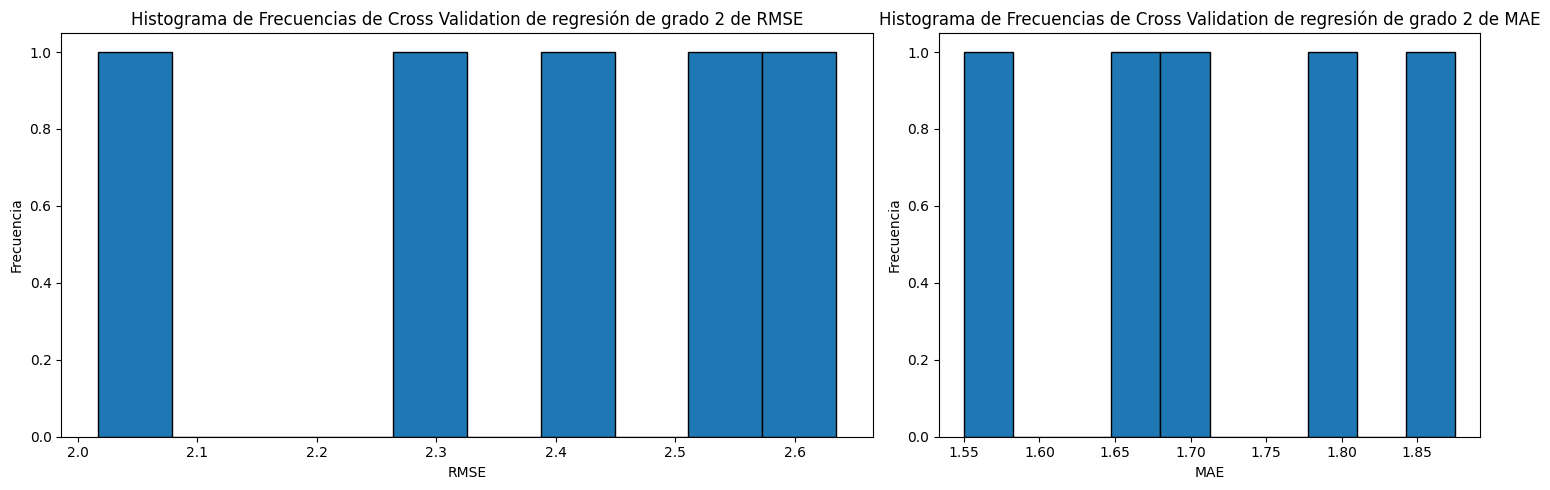

Rmse train: 2.3150853265890063
MAE train: 1.643419082904583
Degree: 2
Cross Validations average RMSE: 2.383581475594471
Cross Validations average MAE: 1.7178443878307472


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

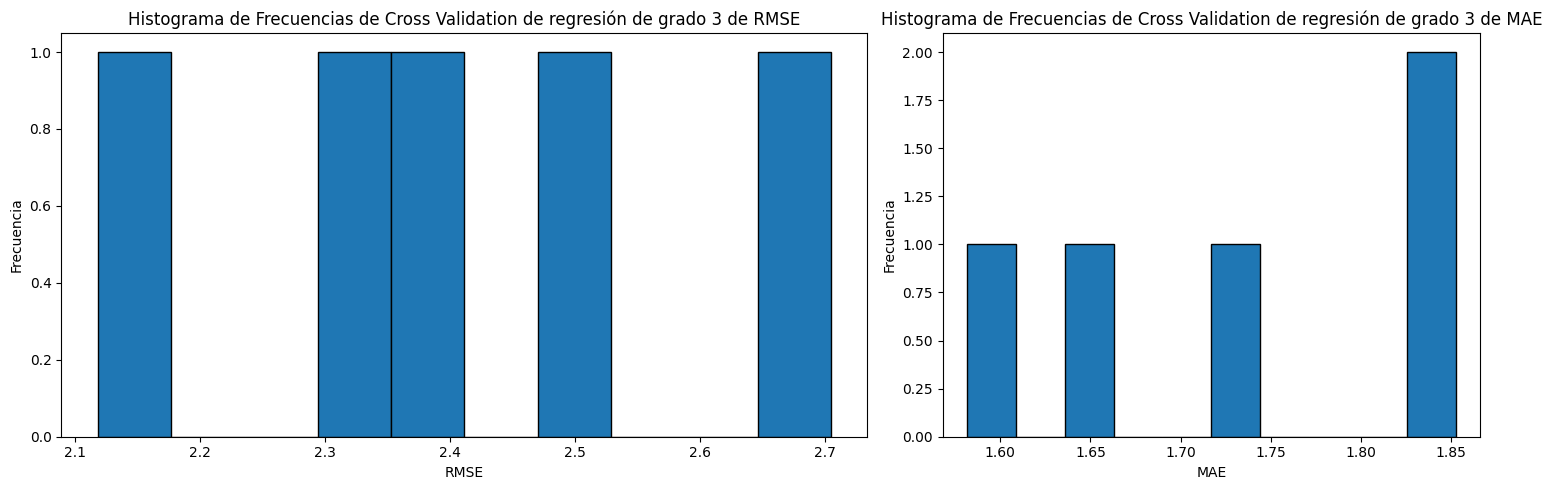

Rmse train: 2.2715635385950814
MAE train: 1.6104974433231982
Degree: 3
Cross Validations average RMSE: 2.4142918409805585
Cross Validations average MAE: 1.725325291367615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

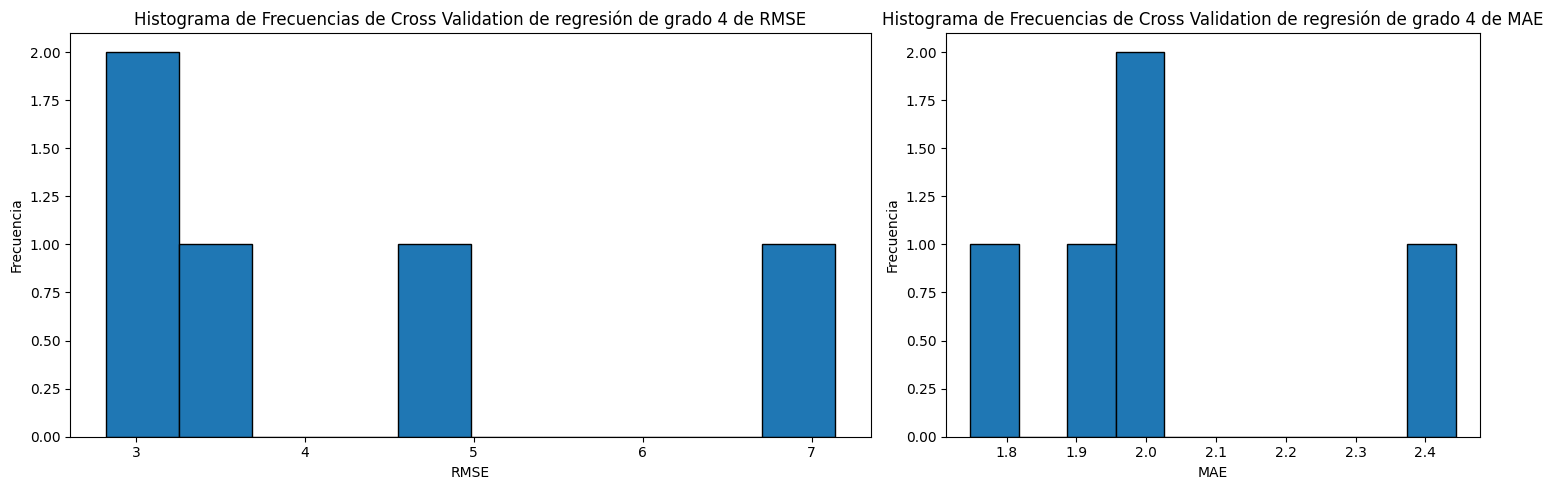

Rmse train: 2.168220161563809
MAE train: 1.542425106014463
Degree: 4
Cross Validations average RMSE: 4.167354307870054
Cross Validations average MAE: 2.020135144505962


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

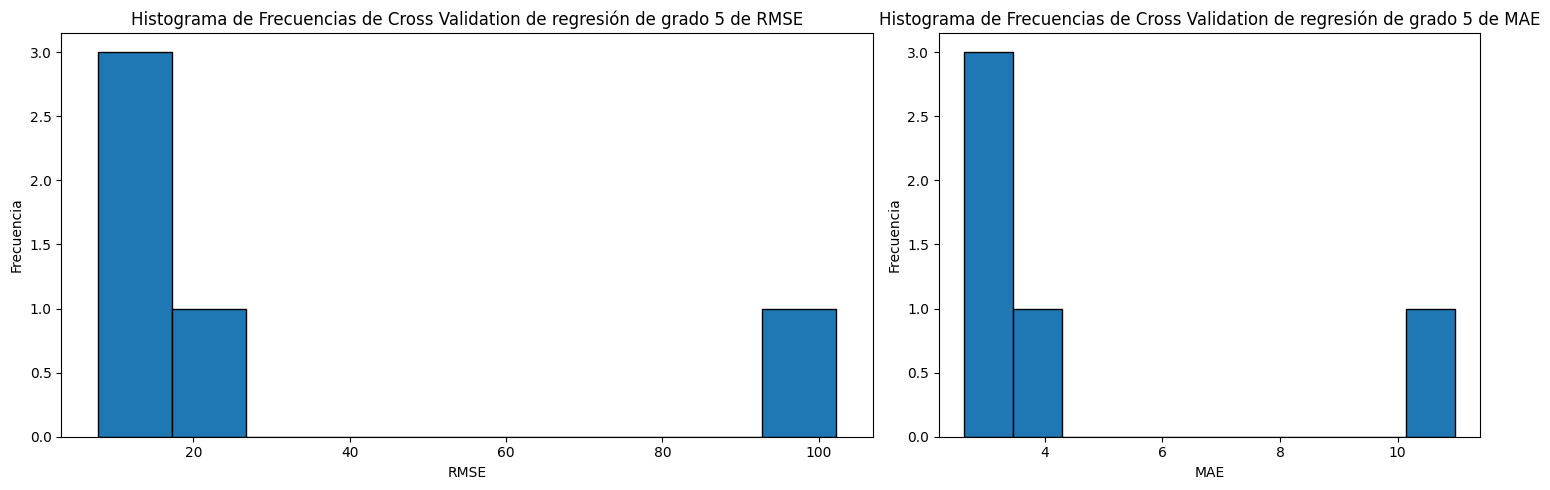

Rmse train: 2.0750779952959397
MAE train: 1.46675843893041
Degree: 5
Cross Validations average RMSE: 31.001110596608992
Cross Validations average MAE: 4.675129435432632


<IPython.core.display.Javascript object>

In [ ]:
degrees = [1, 2, 3, 4, 5]
tb = widgets.TabBar([str(order) for order in degrees])

RMSE = []
MAE = []
RMSET = []
MAET = []
for degree in degrees:
  with tb.output_to(str(degree), select= (degree < 2)):
    model, polynomial_features, rmseT, maeT = Model(X_train, y_train, degree)

    particiones = 5
    average_scoreRMSE, average_scoreMAE, rmses, maes = CrossVal(particiones,X,y,degree, model, polynomial_features)

    graphMultiModel3D(rmses, maes, degree)

    print("Rmse train:", rmseT)
    print("MAE train:", maeT)
    print("Degree:", degree)
    print("Cross Validations average RMSE:", average_scoreRMSE)
    print("Cross Validations average MAE:", average_scoreMAE)

    RMSE.append(average_scoreRMSE)
    RMSET.append(rmseT)
    MAE.append(average_scoreMAE)
    MAET.append(maeT)

Como se puede verificar, **el modelo con mejor desempeño fue el de grado 2**. Esto lo concluimos a partir del *average_RMSE* y *average_MAE*. Además, es de resaltar, a medida que aumentamos el grado del polinomio, el rmse de entrenamiento puede resultar bastante bueno, pero por medio de cross-validation conlcuimos que esto es un caso especifico, pues observando el  *average_RMSE* y *average_MAE* de cross-validation, a medida que aumentamos el grado, el rmse y mae crecen muy rapido, sugiriendo sobreajuste.

Finalmente, decidimos comparar por medio de una gráfica de lineas, el rmse-mae en entrenamiento contra el *average_rmse - average_mae* de cross-validation. Esto para confirmar por ultima vez nuestra selección de el mejor modelo.

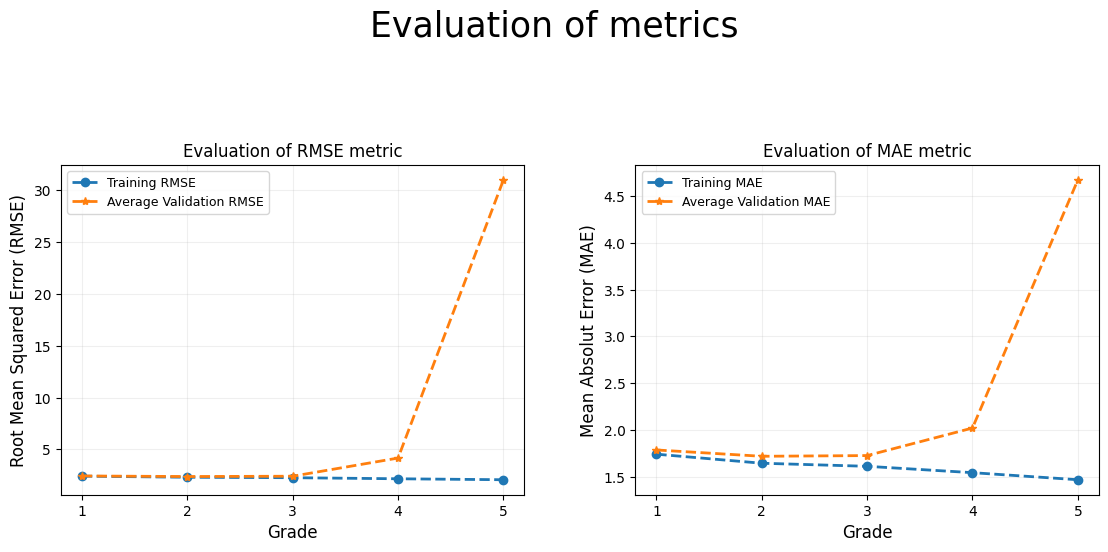

In [ ]:
plt.figure(figsize=(12,6))
plt.suptitle("Evaluation of metrics", fontsize=25)

plt.subplot(121)
plt.title("Evaluation of RMSE metric")
plt.plot(degrees, RMSET, '--o', label='Training RMSE', linewidth=2)
plt.plot(degrees, RMSE, '--*', label='Average Validation RMSE', linewidth=2)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xticks(degrees,['1','2','3','4','5'])
plt.grid(alpha=0.2)
plt.legend(fontsize=9)



plt.subplot(122)
plt.title("Evaluation of MAE metric")
plt.plot(degrees, MAET, '--o', label='Training MAE', linewidth=2 )
plt.plot(degrees, MAE, '--*', label='Average Validation MAE', linewidth=2)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Mean Absolut Error (MAE)", fontsize=12)
plt.xticks(degrees,['1','2','3','4','5'])
plt.grid(alpha=0.2)
plt.legend(fontsize=9)
plt.tight_layout(pad=4.0)
plt.show()

A partir de la anterior gráfica, podemos observar que el mejor modelo corresponde al de grado 2, confirmando nuestro análisis expuesto anteriormente. Esto se debe al equilibrio entre el rmse de entrenamiento y el average_rmse de cross-validation.



**Como parte final de este punto, las celdas posteriores deben ser ejecutadas por el conjunto del test del profesor.**

In [ ]:
model, polynomial_features, rmseT, maeT = Model(X, y, 2)

**A continuación, debe ubicar su conjunto de test en las variables X_test e y_test. Se imprimirá el rmse y el mae como métricas de evaluación**

In [ ]:
X_test = #X test
y_test = #Y test
X_test_poly = polynomial_features.transform(X_test)
y_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)